# **Rani Son**

## **Part 1 Python**

## **An Statistical Analysis of Adults**

### *Before starting, I want to import all of the Libraries I need for analysis*

In [26]:
import pandas as pd

In [27]:
import numpy as np

In [28]:
from tabulate import tabulate

In [29]:
from scipy import stats
import matplotlib.pyplot as plt

In [30]:
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv"
df = pd.read_csv(url, sep=",")

# **Firstly, I want a view of the dataset I just imported.**

In [44]:
print(df)

       age         workclass  education         marital-status  \
0       50  Self-emp-not-inc         13     Married-civ-spouse   
1       38           Private          9               Divorced   
2       49           Private          5  Married-spouse-absent   
3       52  Self-emp-not-inc          9     Married-civ-spouse   
4       31           Private         14          Never-married   
...    ...               ...        ...                    ...   
14792   43  Self-emp-not-inc         10     Married-civ-spouse   
14793   32           Private          6     Married-civ-spouse   
14794   32           Private         14          Never-married   
14795   58           Private          9                Widowed   
14796   22           Private          9          Never-married   

              occupation     sex  capital-gain  capital-loss income  \
0        Exec-managerial    Male             0             0  <=50K   
1      Handlers-cleaners    Male             0             0  <=5

## **The crosstabulation of Workclass and Sex**

In [32]:
df_crosstab = pd.crosstab(df['workclass'], df['sex'], margins = 1)
print(df_crosstab)

sex               Female  Male    All
workclass                            
?                    377   452    829
Federal-gov          149   305    454
Local-gov            377   592    969
Never-worked           1     4      5
Private             3574  6707  10281
Self-emp-inc          54   444    498
Self-emp-not-inc     178   992   1170
State-gov            201   385    586
Without-pay            1     4      5
All                 4912  9885  14797


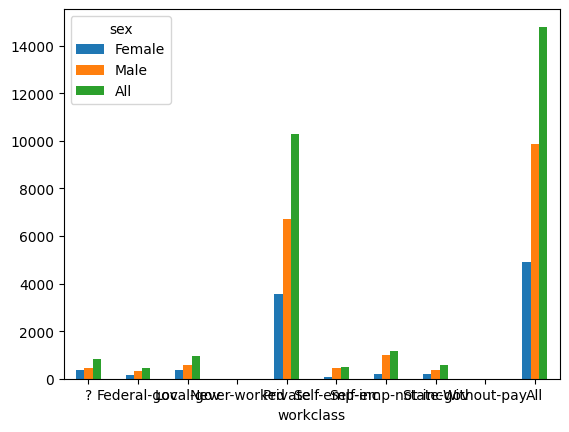

In [33]:
barplot = df_crosstab.plot.bar(rot=0)

## **The Crosstabulation of sex and marital status**

In [34]:
df_crosstab2 = pd.crosstab(df['sex'], df['marital-status'], margins = 1)
print(df_crosstab2)

marital-status  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                               
Female              1219                  7                 761   
Male                 795                  4                6010   
All                 2014                 11                6771   

marital-status  Married-spouse-absent  Never-married  Separated  Widowed  \
sex                                                                        
Female                             95           2160        290      380   
Male                              104           2717        182       73   
All                               199           4877        472      453   

marital-status    All  
sex                    
Female           4912  
Male             9885  
All             14797  


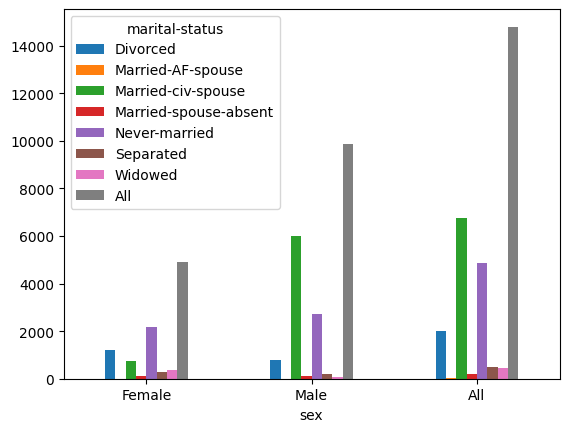

In [35]:
barplot = df_crosstab2.plot.bar(rot=0)

## **Finding the data in which age is over 40**

In [36]:
df_AdultsOver40 = df[df['age'] > 40]

In [37]:
print(df_AdultsOver40)

       age         workclass  education         marital-status  \
0       50  Self-emp-not-inc         13     Married-civ-spouse   
2       49           Private          5  Married-spouse-absent   
3       52  Self-emp-not-inc          9     Married-civ-spouse   
7       43           Private          7     Married-civ-spouse   
8       54                 ?         10     Married-civ-spouse   
...    ...               ...        ...                    ...   
14787   45         Local-gov         12               Divorced   
14790   65  Self-emp-not-inc         15          Never-married   
14791   43         State-gov         10               Divorced   
14792   43  Self-emp-not-inc         10     Married-civ-spouse   
14795   58           Private          9                Widowed   

             occupation     sex  capital-gain  capital-loss income  
0       Exec-managerial    Male             0             0  <=50K  
2         Other-service  Female             0             0  <=50K  


## **The Crosstabulation of adults over 40 of sex and marital status**

In [38]:
df_crosstab3 = pd.crosstab(df_AdultsOver40['sex'], df_AdultsOver40['marital-status'], margins = False)
print(df_crosstab3)

marital-status  Divorced  Married-civ-spouse  Married-spouse-absent  \
sex                                                                   
Female               720                 305                     38   
Male                 448                3383                     47   

marital-status  Never-married  Separated  Widowed  
sex                                                
Female                    256        133      354  
Male                      315         74       71  


In [46]:
df['education'] = stats.zscore(df.education, nan_policy='omit')

In [47]:
Education_outliers = df.query('(education > 3 | education < -3)')['education']

In [48]:
Education_outliers

72      -3.105523
101     -3.490403
199     -3.105523
243     -3.105523
437     -3.105523
           ...   
14254   -3.105523
14318   -3.105523
14475   -3.105523
14551   -3.490403
14724   -3.105523
Name: education, Length: 113, dtype: float64

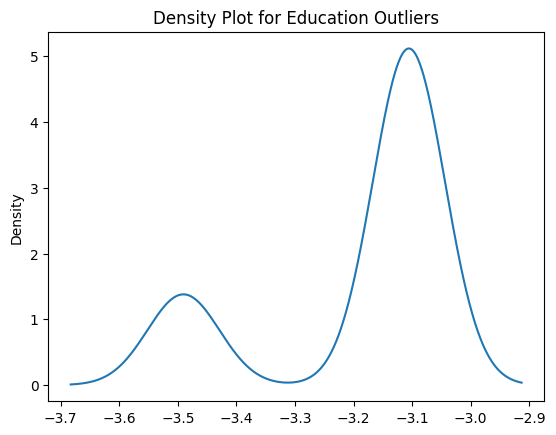

In [49]:
Education_outliers.plot.density()
plt.title('Density Plot for Education Outliers')
plt.show()

In [51]:
df['scaled_age'] = stats.zscore(df.age, nan_policy='omit')

In [52]:
df_outliers = df.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

In [56]:
df_outliers

99       3.751354
204      3.020275
492      3.751354
552      3.605138
885      3.751354
1066     3.751354
1485     3.166491
2420     3.751354
2430     3.020275
2467     3.751354
2877     3.751354
3453     3.239598
3868     3.385814
3891     3.166491
4008     3.020275
4114     3.751354
4643     3.020275
4680     3.751354
5154     3.312706
5481     3.751354
5936     3.751354
5961     3.312706
6450     3.020275
6476     3.751354
7147     3.312706
7254     3.751354
7651     3.093383
7724     3.020275
8346     3.020275
8405     3.751354
8477     3.020275
8608     3.751354
8768     3.239598
8773     3.166491
8785     3.751354
8921     3.751354
9369     3.166491
9397     3.385814
9561     3.093383
9857     3.093383
10158    3.751354
10282    3.166491
10468    3.605138
10470    3.312706
10991    3.458922
11091    3.751354
11108    3.166491
11234    3.093383
11562    3.751354
11604    3.020275
12656    3.312706
12948    3.751354
13455    3.093383
14091    3.751354
14281    3.532030
14455    3

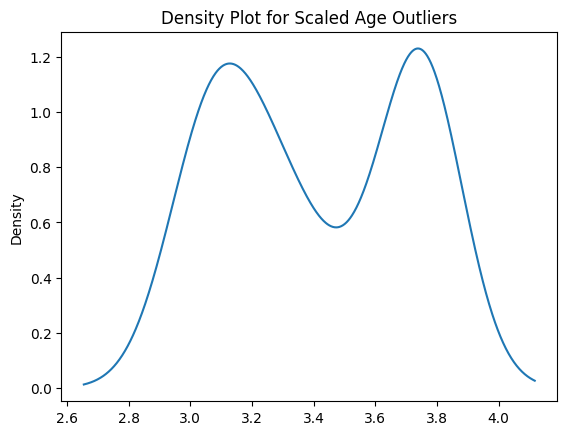

In [42]:
df_outliers.plot.density()
plt.title('Density Plot for Scaled Age Outliers')
plt.show()

<ipython-input-43-3dd4489c173e>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df.age.hist([df['age'] > 80])


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

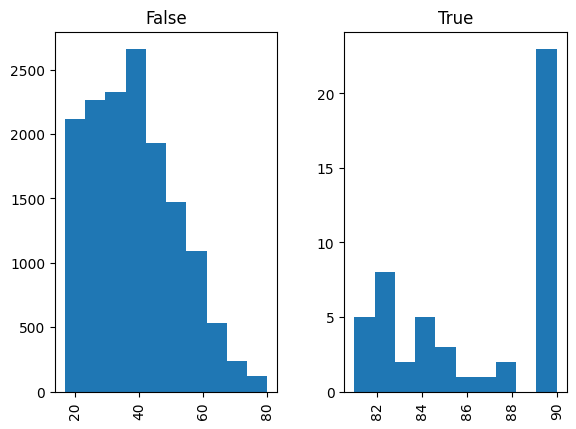

In [43]:
df_AgeOver80 = df[df['age'] > 80]
df.age.hist([df['age'] > 80])

## **In summary, first, I did a cross tabulation of work class and sex. The cross tab shows the totals in relation to the rows and columns, which lets us see the relationship between the values.**

## **Again, I created another cross tabulation, but this time for sec and marital status. The same analysis can be done for this table.**

## **After creating a new dataframe of Adults Over 40, more than half of the values from the original dataframe were gone.**

## **Creating a crosstabulation table of sex and marital status once again, except that it is for adults over 40. I think that since there is less data than beofre the relations might be be so accurate.**

## **There appeared to be 113 outliers in the education column.**

## **After standardizing age, I found that there were 60 outliers. The most extreme being 3.751354**

## **Lastly, after finding the records in which age was greater than 80 I saw that a majority of the data values lie closer to 90 than 80.**